In [93]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [94]:
df= pd.read_csv('/content/creditcard.csv')

In [95]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [96]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [98]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [99]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [100]:
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [101]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [102]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [103]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [104]:
# compare the values for both transaction
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [105]:
legit_sample = legit.sample(n=492)

In [106]:
new_df= pd.concat([legit_sample, fraud], axis=0)

In [107]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
207893,136875.0,1.986933,0.152687,-1.742530,1.201887,0.664116,-0.669493,0.602017,-0.303309,-0.098654,...,0.086327,0.417769,-0.090703,-0.387968,0.503266,-0.491311,-0.022744,-0.071448,26.97,0
236325,148764.0,-2.805866,-8.172561,-2.389857,3.934059,-3.378570,0.870096,2.271596,-0.450428,-0.015752,...,1.414892,-1.533439,-1.704748,0.076232,-1.962399,1.793909,-0.609577,0.369297,2464.32,0
2725,2269.0,-0.724537,1.044772,0.681137,-0.356350,0.032158,-0.000877,0.095074,0.702605,-0.421149,...,-0.231419,-0.883982,-0.082189,-0.916965,-0.114069,0.135538,0.118387,0.031898,9.98,0
74840,55781.0,0.911100,-1.056662,0.704476,0.355754,-1.566045,-0.837876,-0.223663,-0.230195,-0.642964,...,-0.501813,-1.247203,0.045930,0.933834,0.075751,0.231457,-0.031574,0.061972,209.00,0
256855,157894.0,-0.980128,0.334525,-0.775471,-4.058686,0.493699,0.223561,0.446767,0.332670,-0.195251,...,-0.020551,0.462587,-0.182166,-0.340586,0.246240,-0.665176,-0.304758,0.050467,30.00,0


In [108]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [109]:
#splitting the data into Features & Targets

X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [110]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
207893  136875.0  1.986933  0.152687 -1.742530  1.201887  0.664116 -0.669493   
236325  148764.0 -2.805866 -8.172561 -2.389857  3.934059 -3.378570  0.870096   
2725      2269.0 -0.724537  1.044772  0.681137 -0.356350  0.032158 -0.000877   
74840    55781.0  0.911100 -1.056662  0.704476  0.355754 -1.566045 -0.837876   
256855  157894.0 -0.980128  0.334525 -0.775471 -4.058686  0.493699  0.223561   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [111]:
print(Y)

207893    0
236325    0
2725      0
74840     0
256855    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [112]:
#split the data into Training data & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [113]:
#Model Training
#Logistic Regression
mod=LogisticRegression()

In [114]:
# training the Logistic Regression Model with Training Data
mod.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:
# accuracy on training data
X_train_prediction = mod.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
confusion_matrix(X_train_prediction, Y_train, labels = [0,1])

array([[382,  30],
       [ 11, 364]])

In [116]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9479034307496823


In [117]:
# accuracy on test data
X_test_prediction = mod.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
confusion_matrix(X_test_prediction, Y_test, labels = [0, 1])

array([[93,  9],
       [ 6, 89]])

In [118]:
print('Accurate score on Test Data : ', test_data_accuracy)

Accurate score on Test Data :  0.9238578680203046


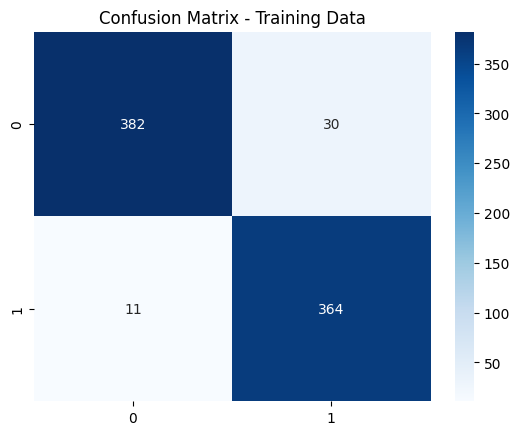

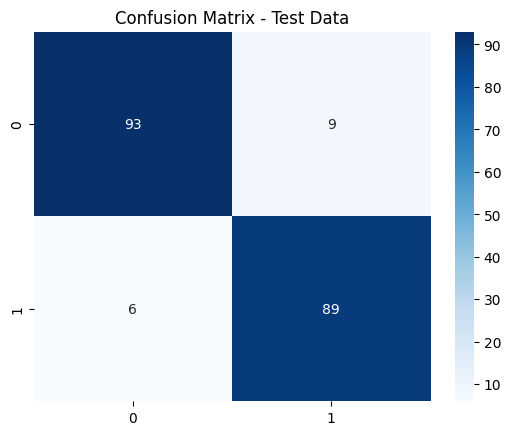

In [119]:
# Confusion Matrix for Training Data
cm_train = confusion_matrix(X_train_prediction, Y_train, labels=[0, 1])
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Training Data')
plt.show()

# Confusion Matrix for Test Data
cm_test = confusion_matrix(X_test_prediction, Y_test, labels=[0, 1])
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Test Data')
plt.show()

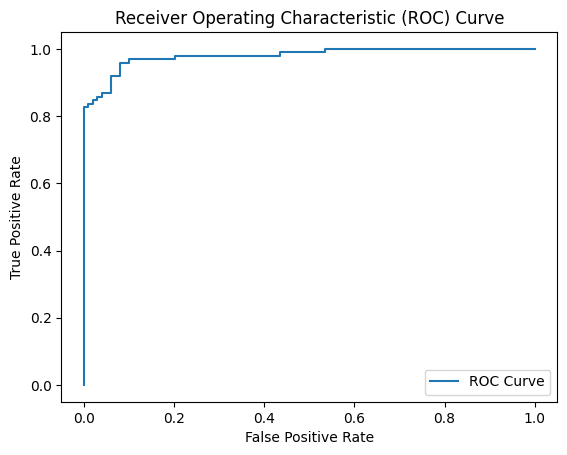

In [120]:
# ROC Curve Visualization for Test Data
fpr, tpr, thresholds = roc_curve(Y_test, mod.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [121]:
# Area under the ROC curve (AUC-ROC)
auc_roc = roc_auc_score(Y_test, mod.predict_proba(X_test)[:, 1])
print('AUC-ROC Score:', auc_roc)

AUC-ROC Score: 0.9795918367346939


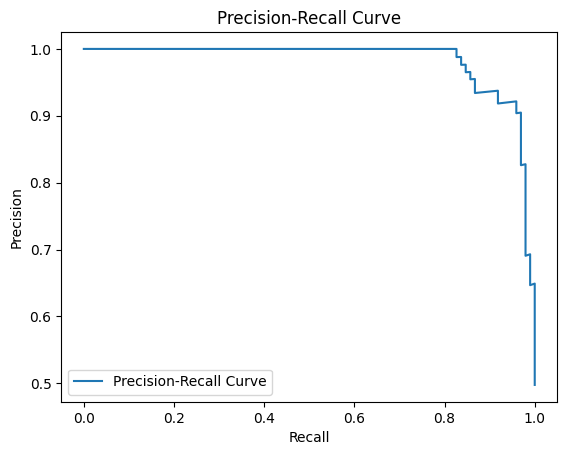

In [122]:
# Precision-Recall Curve Visualization for Test Data
precision, recall, _ = precision_recall_curve(Y_test, mod.predict_proba(X_test)[:, 1])
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [123]:
# Area under the Precision-Recall curve (AUC-PR)
auc_pr = auc(recall, precision)
print('AUC-PR Score:', auc_pr)

AUC-PR Score: 0.9827966303122181


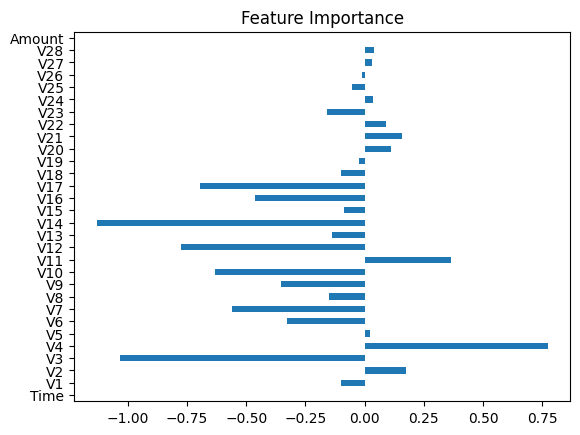

In [124]:
# Feature Importance Visualization
feature_importance = pd.Series(mod.coef_[0], index=X.columns)
feature_importance.plot(kind='barh')
plt.title('Feature Importance')
plt.show()

In [125]:
print(X_test_prediction)

[1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0
 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0
 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0
 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1
 0 0 0 1 0 1 1 0 1 1 1 0]


In [126]:
pred=X_test_prediction
if 1 in pred:
    print("Fraud Detected")
else:
    print("Transaction is genuine")

Fraud Detected
